In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/My Drive/1340-A3")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
df = pd.read_excel('INF2178_A1_data.xlsx')

In [ ]:

df['BED_OCCUPANCY_RATE'] = df['OCCUPIED_BEDS'] / df['CAPACITY_ACTUAL_BED'] * 100 # Create BED_OCCUPANCY_RATE Calculated bed occupancy rate

df['ROOM_OCCUPANCY_RATE'] = df['OCCUPIED_ROOMS'] / df['CAPACITY_ACTUAL_ROOM'] * 100 #Create Room_OCCUPANCY_RATE Calculated Room occupancy rate

df['OCCUPANCY_RATE'] = df['BED_OCCUPANCY_RATE'].fillna(df['ROOM_OCCUPANCY_RATE']) # Create OCCUPANCY_RATE and replace it with room occupancy when bed occupancy is NA

df.drop(['BED_OCCUPANCY_RATE', 'ROOM_OCCUPANCY_RATE'], axis=1, inplace=True) # delete BED_OCCUPANCY_RATE and room_OCCUPANCY_RATE



df.head(5) #show first 5 rows of dataframe

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,OCCUPANCY_RATE
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0,89.655172
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0,100.000000
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0,82.142857
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0,100.000000
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0,92.857143


In [ ]:
# Select only specific columns to compose the new dataset selected_df.
selected_column = ['CAPACITY_TYPE','PROGRAM_MODEL','SERVICE_USER_COUNT','CAPACITY_ACTUAL_BED','OCCUPIED_BEDS','CAPACITY_ACTUAL_BED','OCCUPIED_ROOMS','SECTOR','OCCUPANCY_DATE','OCCUPANCY_RATE']
df_selected = df[selected_column]

In [ ]:
#We extract the month data from the OCCUPANCY_DATE data and form a new column called ’month‘
df_selected['MONTH'] = df_selected['OCCUPANCY_DATE'].dt.month

<ipython-input-6-f57ccc6a4953>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['MONTH'] = df_selected['OCCUPANCY_DATE'].dt.month


In [ ]:
# Show first 5 rows of df_selected
df_selected.head(5)

,CAPACITY_TYPE,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_BED,OCCUPIED_ROOMS,SECTOR,OCCUPANCY_DATE,OCCUPANCY_RATE,MONTH
0,Room Based Capacity,Emergency,74,NaN,NaN,NaN,26.0,Families,2021-01-01,89.655172,1
1,Room Based Capacity,Emergency,3,NaN,NaN,NaN,3.0,Mixed Adult,2021-01-01,100.000000,1
2,Room Based Capacity,Emergency,24,NaN,NaN,NaN,23.0,Men,2021-01-01,82.142857,1
3,Room Based Capacity,Emergency,25,NaN,NaN,NaN,17.0,Mixed Adult,2021-01-01,100.000000,1
4,Room Based Capacity,Emergency,13,NaN,NaN,NaN,13.0,Women,2021-01-01,92.857143,1


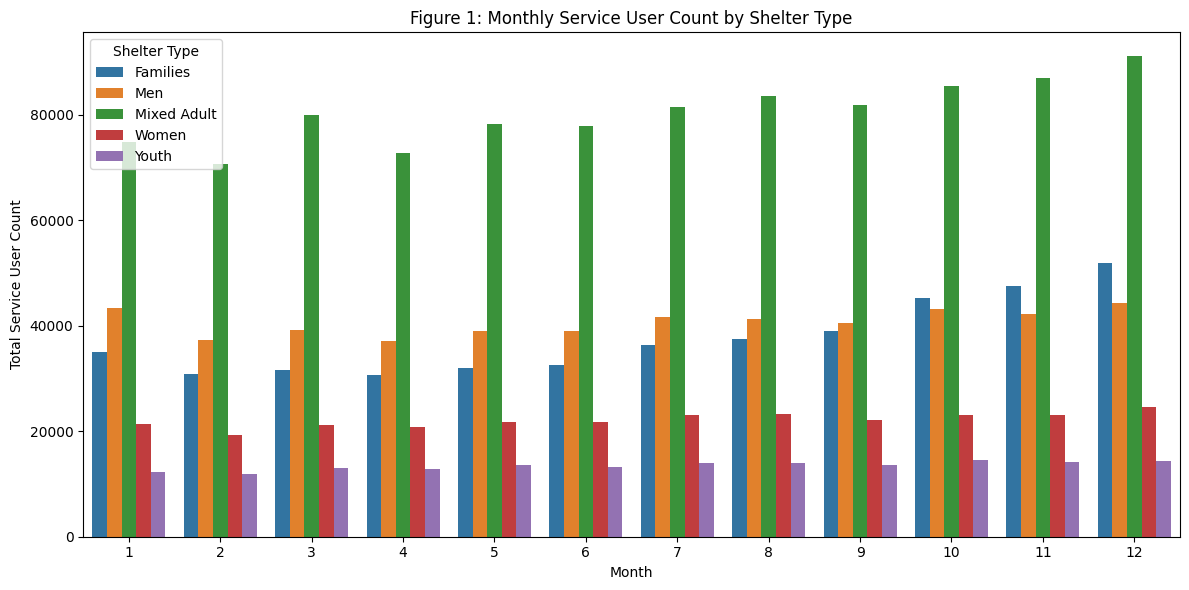

In [ ]:
# We calculated the total number of SERVICE_USER_COUNT for each sector in each month, grouped by month and sector type
monthly_service_user_count = df_selected.groupby(['MONTH', 'SECTOR'])['SERVICE_USER_COUNT'].sum().reset_index()

# Create a bar graph to show the number of SERVICE_USER_COUNT for different sectors in different months
plt.figure(figsize=(12, 6))
sns.barplot(x='MONTH', y='SERVICE_USER_COUNT', hue='SECTOR', data=monthly_service_user_count)
plt.title('Figure 1: Monthly Service User Count by Shelter Type')
plt.ylabel('Total Service User Count')
plt.xlabel('Month')
plt.legend(title='Shelter Type',  loc='upper left')
plt.tight_layout()
plt.show()





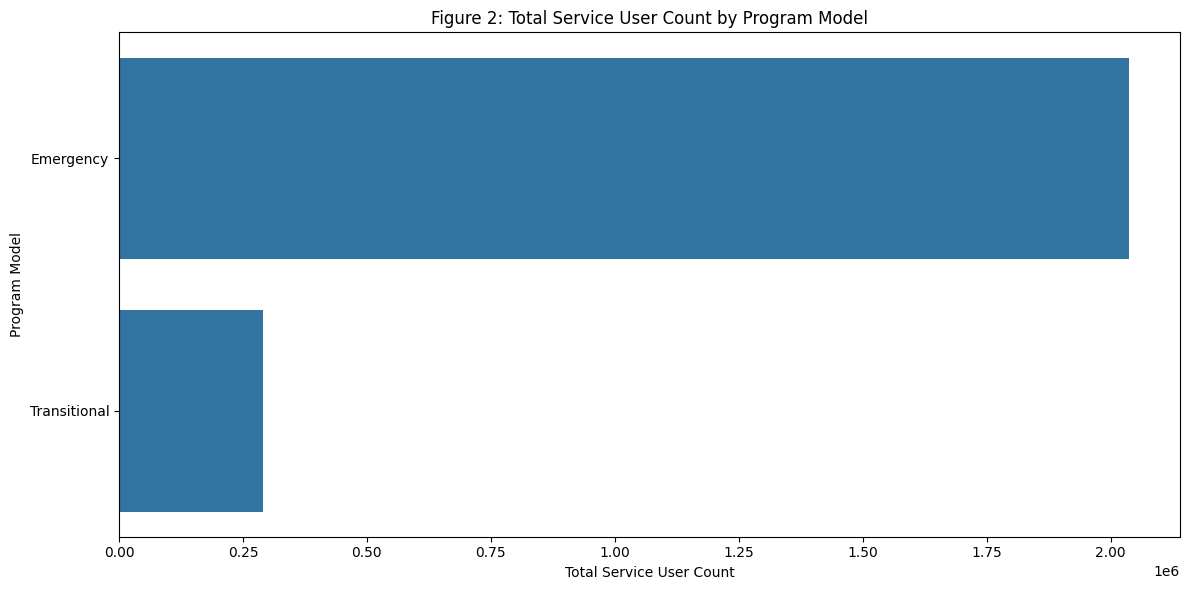

In [ ]:
#We grouped the data based on PROGRAM_MODEL and then calculated the SERVICE_USER_COUNT totals for each model.
service_user_total = df_selected.groupby('PROGRAM_MODEL')['SERVICE_USER_COUNT'].sum().reset_index()

#Create a bar graph to show the sum of the SERVICE_USER_COUNT for two PROGRAM_MODEL.
plt.figure(figsize=(12, 6))
sns.barplot(x='SERVICE_USER_COUNT', y='PROGRAM_MODEL', data=service_user_total)
plt.title('Figure 2: Total Service User Count by Program Model')
plt.xlabel('Total Service User Count')
plt.ylabel('Program Model')
plt.tight_layout()
plt.show()


In [ ]:
shelter_types = df['SECTOR'].unique()
shelter_types

array(['Families', 'Mixed Adult', 'Men', 'Women', 'Youth'], dtype=object)

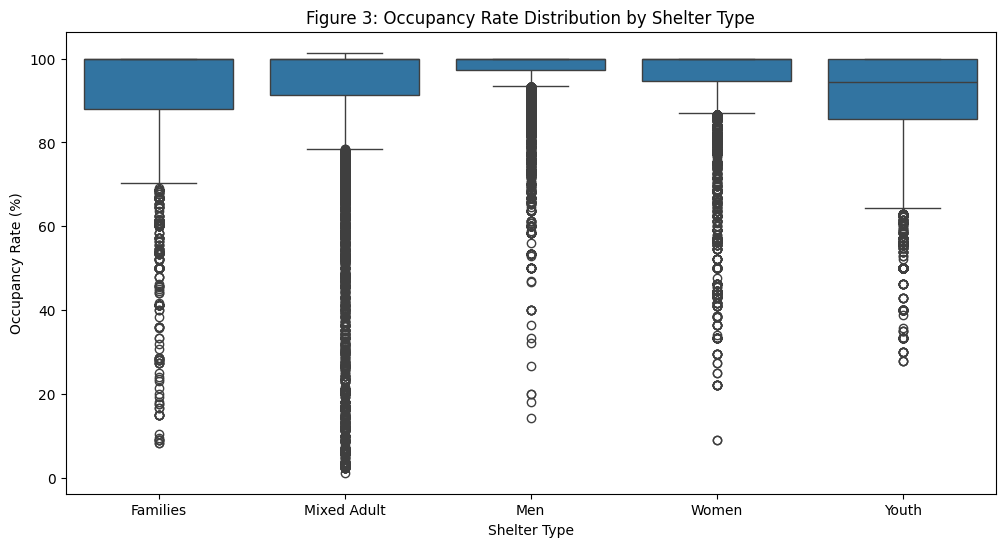

In [ ]:
#Create box plots to show the distribution of different sectors including medians, quartiles, and outliers.
plt.figure(figsize=(12, 6))
sns.boxplot(x='SECTOR', y='OCCUPANCY_RATE', data=df_selected)
plt.title('Figure 3: Occupancy Rate Distribution by Shelter Type')
plt.xlabel('Shelter Type')
plt.ylabel('Occupancy Rate (%)')
plt.show()

In [ ]:
#Filter out different sectors data and select their 'occupancy_rate'
families_data = df_selected[df_selected['SECTOR'] == 'Families']['OCCUPANCY_RATE']
Mixed_Adult_data = df_selected[df_selected['SECTOR'] == 'Mixed Adult']['OCCUPANCY_RATE']
Men_data = df_selected[df_selected['SECTOR'] == 'Men']['OCCUPANCY_RATE']
Women_data = df_selected[df_selected['SECTOR'] == 'Women']['OCCUPANCY_RATE']
Youth_data = df_selected[df_selected['SECTOR'] == 'Youth']['OCCUPANCY_RATE']

# Descriptive statistics for different sectors
families_stats = families_data.describe()
Mixed_Adult_stats = Mixed_Adult_data.describe()
Men_stats = Men_data.describe()
Women_stats = Women_data.describe()
Youth_stats = Youth_data.describe()
print(families_stats, Mixed_Adult_stats, Men_stats, Women_stats, Youth_stats)

count    5649.000000
mean       92.146385
std        13.694761
min         8.333333
25%        88.059701
50%       100.000000
75%       100.000000
max       100.000000
Name: OCCUPANCY_RATE, dtype: float64 count    15533.000000
mean        91.189309
std         17.981674
min          1.204819
25%         91.358025
50%        100.000000
75%        100.000000
max        101.408451
Name: OCCUPANCY_RATE, dtype: float64 count    12241.000000
mean        96.643495
std          7.614572
min         14.285714
25%         97.368421
50%        100.000000
75%        100.000000
max        100.000000
Name: OCCUPANCY_RATE, dtype: float64 count    9258.000000
mean       94.697020
std        11.070768
min         9.090909
25%        94.736842
50%       100.000000
75%       100.000000
max       100.000000
Name: OCCUPANCY_RATE, dtype: float64 count    8263.000000
mean       89.776104
std        13.727715
min        27.777778
25%        85.714286
50%        94.444444
75%       100.000000
max       100.000

<ipython-input-12-bb35509ffa65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['OCCUPANCY_DATE'] = pd.to_datetime(df_selected['OCCUPANCY_DATE'])


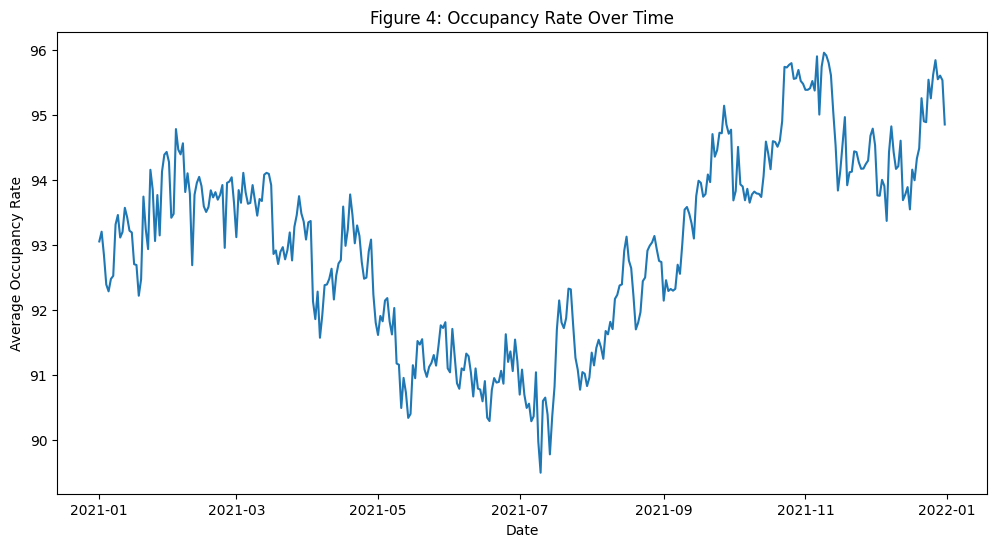

In [ ]:
# Convert 'OCCUPANCY_DATE' Column Data to Date-Time Objects
df_selected['OCCUPANCY_DATE'] = pd.to_datetime(df_selected['OCCUPANCY_DATE'])

# Calculate the average occupancy rate for each date
daily_occupancy_rate = df_selected.groupby(df_selected['OCCUPANCY_DATE'].dt.date)['OCCUPANCY_RATE'].mean().reset_index()

# Create a line graph to reflect changes in occupancy rate over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='OCCUPANCY_DATE', y='OCCUPANCY_RATE', data=daily_occupancy_rate)
plt.title('Figure 4: Occupancy Rate Over Time')
plt.ylabel('Average Occupancy Rate')
plt.xlabel('Date')
plt.show()


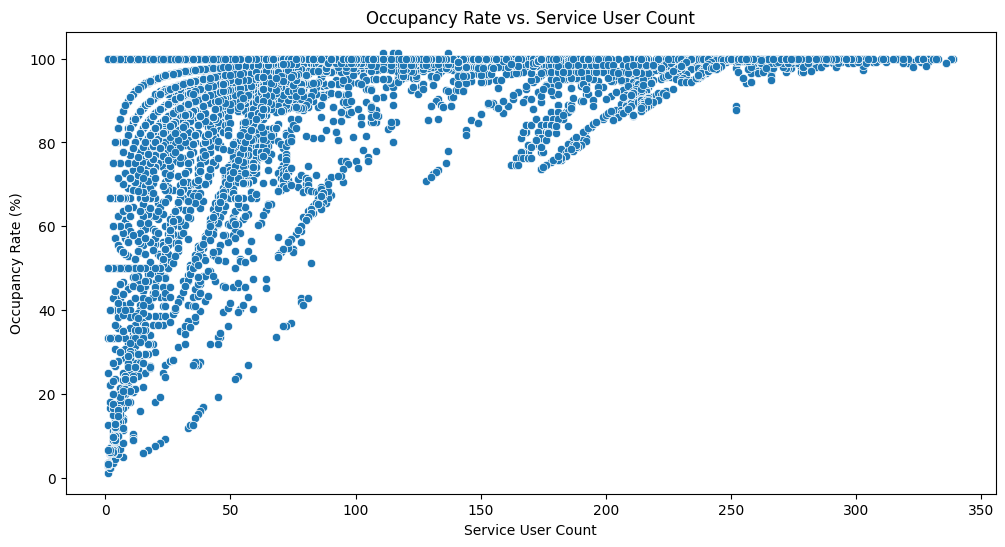

In [ ]:
# create a scatterplot for occupancy rate vs service user count
plt.figure(figsize=(12, 6))
sns.scatterplot(x='SERVICE_USER_COUNT', y='OCCUPANCY_RATE', data=df_selected)
plt.title('Occupancy Rate vs. Service User Count')
plt.xlabel('Service User Count')
plt.ylabel('Occupancy Rate (%)')
plt.show()


In [ ]:
from scipy.stats import ttest_ind

summer_months = [6, 7, 8] # we defined summer time as June,July and August
winter_months = [12, 1, 2] # we defined winter time as December, January and February

# Filtering summer and winter data
summer_data = df_selected[df_selected['MONTH'].isin(summer_months)]
winter_data = df_selected[df_selected['MONTH'].isin(winter_months)]

# Get summer and winter occupancy rates
summer_rates = summer_data['OCCUPANCY_RATE'].dropna()
winter_rates = winter_data['OCCUPANCY_RATE'].dropna()

# Conduct T test between Summer occupancy rate and winter occupancy rates
t_stat, p_value = ttest_ind(summer_rates, winter_rates)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -13.732150632203595, P-value: 9.256519912353863e-43


In [ ]:
sectors = df['SECTOR'].unique()
sectors

array(['Families', 'Mixed Adult', 'Men', 'Women', 'Youth'], dtype=object)

In [ ]:
sector1 = 'Families'
sector2 = 'Mixed Adult'
sector3 = 'Men'
sector4 =  'Women'
sector5 =  'Youth'

# Filtering  different SECTORS occupancy rate from summer data
summer_rates_sector1 = summer_data[(summer_data['SECTOR'] == sector1)]['OCCUPANCY_RATE'].dropna()
summer_rates_sector2 = summer_data[(summer_data['SECTOR'] == sector2)]['OCCUPANCY_RATE'].dropna()
summer_rates_sector3 = summer_data[(summer_data['SECTOR'] == sector3)]['OCCUPANCY_RATE'].dropna()
summer_rates_sector4 = summer_data[(summer_data['SECTOR'] == sector4)]['OCCUPANCY_RATE'].dropna()
summer_rates_sector5 = summer_data[(summer_data['SECTOR'] == sector5)]['OCCUPANCY_RATE'].dropna()

# Filtering  different SECTORS occupancy rate from winter data
winter_rates_sector1 = winter_data[(winter_data['SECTOR'] == sector1)]['OCCUPANCY_RATE'].dropna()
winter_rates_sector2 = winter_data[(winter_data['SECTOR'] == sector2)]['OCCUPANCY_RATE'].dropna()
winter_rates_sector3 = winter_data[(winter_data['SECTOR'] == sector3)]['OCCUPANCY_RATE'].dropna()
winter_rates_sector4 = winter_data[(winter_data['SECTOR'] == sector4)]['OCCUPANCY_RATE'].dropna()
winter_rates_sector5 = winter_data[(winter_data['SECTOR'] == sector5)]['OCCUPANCY_RATE'].dropna()


# Conduct T test between summer and winter occupancy rate of Families
t_stat_sector1, p_value_sector1 = ttest_ind(summer_rates_sector1, winter_rates_sector1)
print(f'{sector1} - Summer vs. Winter: T-statistic={t_stat_sector1}, P-value={p_value_sector1}')

# Conduct T test between summer and winter occupancy rate of Mixed Adult
t_stat_sector2, p_value_sector2 = ttest_ind(summer_rates_sector2, winter_rates_sector2)
print(f'{sector2} - Summer vs. Winter: T-statistic={t_stat_sector2}, P-value={p_value_sector2}')

# # Conduct T test between summer and winter occupancy rate of Men
t_stat_sector3, p_value_sector3 = ttest_ind(summer_rates_sector3, winter_rates_sector3)
print(f'{sector3} - Summer vs. Winter: T-statistic={t_stat_sector3}, P-value={p_value_sector3}')

# Conduct T test between summer and winter occupancy rate of Women
t_stat_sector4, p_value_sector4 = ttest_ind(summer_rates_sector4, winter_rates_sector4)
print(f'{sector4} - Summer vs. Winter: T-statistic={t_stat_sector4}, P-value={p_value_sector4}')

# Conduct T test between summer and winter occupancy rate of Youth
t_stat_sector5, p_value_sector5 = ttest_ind(summer_rates_sector5, winter_rates_sector5)
print(f'{sector5} - Summer vs. Winter: T-statistic={t_stat_sector5}, P-value={p_value_sector5}')

Families - Summer vs. Winter: T-statistic=-6.301147864895831, P-value=3.4240591253713255e-10
Mixed Adult - Summer vs. Winter: T-statistic=-9.99188699937482, P-value=2.2893269759118674e-23
Men - Summer vs. Winter: T-statistic=-1.1295823645188705, P-value=0.2586962292557958
Women - Summer vs. Winter: T-statistic=-11.135510141256827, P-value=1.9108280299836974e-28
Youth - Summer vs. Winter: T-statistic=-0.24141315095392604, P-value=0.8092470288426543
